# Cool vs Warm Image Prediction

**Cool colors** are typically in the **blue and green range (hue values between 90-180 in HSV)**, while **warm colors** are in the **red, orange, and yellow range (hue values between 0-60)**.

In [5]:
import cv2
import numpy as np

# Define a function to classify image as Warm or cool.

def predict_cool_vs_warm(image_path):
    # Load the image and convert to HSV
    image = cv2.imread(image_path)
    image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    
    # Get the hue channel (0 index) 
    # Indices: '0':Hue, '1':Saturation, '2': Value 
    hue = image_hsv[:, :, 0]
    
    # Define warm (0-60) and cool (90-180) ranges
    warm_mask = (hue >= 0) & (hue <= 60)
    cool_mask = (hue >= 90) & (hue <= 180)
    
    print(f'Hue Size: {hue.size}')
    print(f'Warm Mask: {np.sum(warm_mask)}')
    print(f'Cool Mask: {np.sum(cool_mask)}')

    # Calculate the percentage of warm and cool pixels
    warm_percentage = np.sum(warm_mask) / hue.size * 100
    cool_percentage = np.sum(cool_mask) / hue.size * 100
    
    # Decide which is dominant
    if warm_percentage > cool_percentage:
        prediction = "This is a Warm Image."
    else:
        prediction = "This is a Cool Image."
    
    print(f"Warm Pixels: {warm_percentage:.2f}%")
    print(f"Cool Pixels: {cool_percentage:.2f}%")
    
    return prediction

predict_cool_vs_warm('./beach-blue.jpg')


Hue Size: 540000
Warm Mask: 24147
Cool Mask: 454967
Warm Pixels: 4.47%
Cool Pixels: 84.25%


'This is a Cool Image.'

# Dull vs Bright Image Prediction

**Dull images** tend to have **low saturation and value (brightness)**, while bright images have higher values for both. We can use thresholds to classify an image as dull or bright based on these properties.

In [12]:
def predict_dull_vs_bright(image_path):
    # Load the image and convert to HSV
    image = cv2.imread(image_path)
    image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    
    # Get the saturation and value (brightness) channels
    # Indices: '0':Hue, '1':Saturation, '2': Value 
    saturation = image_hsv[:, :, 1]
    value = image_hsv[:, :, 2]
    
    # Define thresholds for dull (low saturation and brightness)
    dull_saturation_threshold = 80
    dull_value_threshold = 100
    
    # Calculate the percentage of dull pixels
    dull_mask = (saturation < dull_saturation_threshold) | (value < dull_value_threshold)
    dull_percentage = np.sum(dull_mask) / saturation.size * 100
    
    print(f'Dull Mask: {np.sum(dull_mask)}')
    print(f'Saturation Size: {saturation.size}')
    print(f'Value Size: {value.size}')

    # Decide whether the image is dull or bright
    if dull_percentage > 50:  # If more than 50% of the image is dull
        prediction = "This Image is Dull."
    else:
        prediction = "This Image is Bright."
    
    print(f"Dull Pixels: {dull_percentage:.2f}%")
    
    return prediction

predict_dull_vs_bright('./beach-blue.jpg')

Dull Mask: 42825
Saturation Size: 540000
Value Size: 540000
Dull Pixels: 7.93%


'This Image is Bright.'

# Color Thresholding

Color thresholding allows you to **filter specific colors** from the image and create a mask out of it.

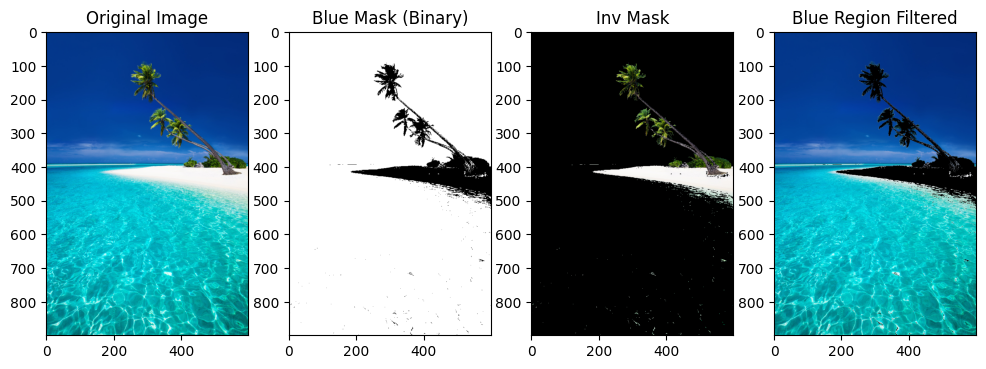

In [19]:
import matplotlib.pyplot as plt

# Define colour range to separate blue from the given Image.
lower_blue = np.array([80, 0, 50])
upper_blue = np.array([120, 255, 255]) 

image = cv2.imread('./beach-blue.jpg')
image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Create mask and apply it
mask = cv2.inRange(image_hsv, lower_blue, upper_blue) 
res = cv2.bitwise_and(image_rgb, image_rgb, mask=mask)

# if the pixel in the hsv image is in the range between lower_blue and upper_blue, it will create a mask.
# The Mask image is black & white Image where all the areas with blue colour is "White" and rest of the region is "Black".
# To apply mask, we are using two same image as an input so that bitwise_and operation gives the same image as Output.
# After that bitwise_and applys mask, that controls which pixels from the source images are used in the output.
# The pixels that are white in the mask are used in the output image, and the pixels that are black in the mask are not used in the output image.
# The result is an image where only the blue pixels are visible and all theb rest of the area is Black.

# Remove Blue Colour and keep the rest of the Image as it is 
mask_inv = cv2.bitwise_not(mask)
res2 = cv2.bitwise_and(image_rgb, image_rgb, mask=mask_inv)
# mask is an optional binary mask. If provided, the operation is applied only to the pixels where the mask value is non-zero.

# Plot the mask to see the region detected and the result
plt.figure(figsize=(12, 6))

# Plot original image
# plt.subplot(nrows, ncols, index)

plt.subplot(1, 4, 1)
plt.imshow(image_rgb)
plt.title('Original Image')
plt.grid(False)  # Turn off grid

# Plot the mask (binary image where white represents detected blue regions)
plt.subplot(1, 4, 2)
plt.imshow(mask, cmap='gray')
plt.title('Blue Mask (Binary)')
plt.grid(False)  # Turn off grid

# Plot the inv blue-filtered result
plt.subplot(1, 4, 3)
plt.imshow(res2)
plt.title('Inv Mask')
plt.grid(False)  # Turn off grid

# Plot the blue-filtered result
plt.subplot(1, 4, 4)
plt.imshow(res)
plt.title('Blue Region Filtered')
plt.grid(False)  # Turn off grid

plt.show()

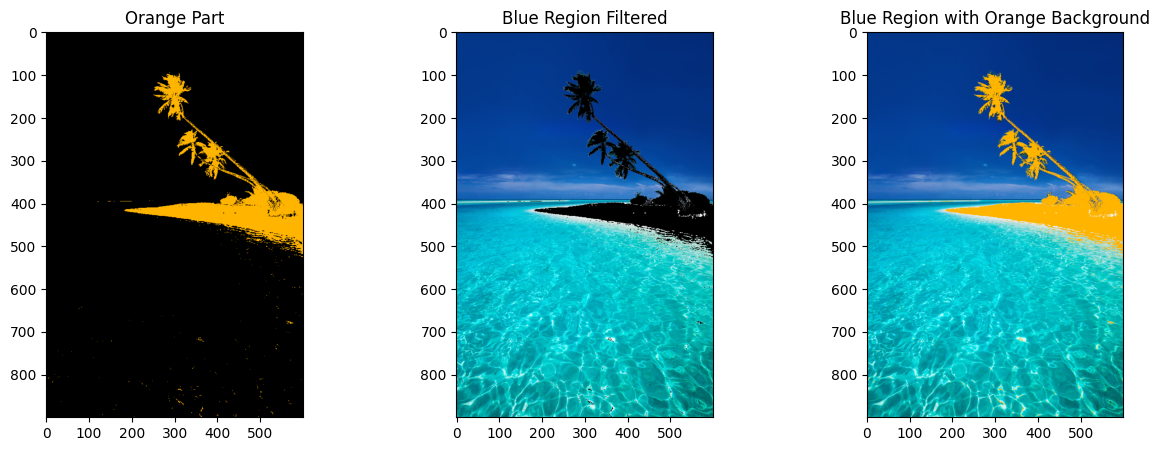

In [21]:
# create an Image of same size image_rgb with all zeros (Black)
orange_image = np.zeros_like(image_rgb) # "zeros_like" returns an array of given shape and type as given array, with zeros. No need to mention shape.

#Fill Image with Orange colour
orange_image[:, :] = [255, 180, 0]

# mask_inv is already created for the same Image in the above code
orange_part = cv2.bitwise_and(orange_image, orange_image, mask=mask_inv)

# Create Blue Region with Orange Background
final_result = cv2.add(res, orange_part)

# Plot the original image, blue-filtered result, and final result
plt.figure(figsize=(15, 5))

# Plot original image
plt.subplot(1, 3, 1)
plt.imshow(orange_part)
plt.title('Orange Part')
plt.grid(False)  # Turn off grid

# Plot the blue-filtered result
plt.subplot(1, 3, 2)
plt.imshow(res)
plt.title('Blue Region Filtered')
plt.grid(False)  # Turn off grid

# Plot the final result (blue regions + orange background)
plt.subplot(1, 3, 3)
plt.imshow(final_result)
plt.title('Blue Region with Orange Background')
plt.grid(False)  # Turn off grid

plt.show()

# What is Contour?

Contour is a curve that **connects all the continous points** along the boundary of an object that have the **same colour or intensity**.

or in-short : **Contours are the boundaries of objects detected in an image**.

No. of Countours: 2589


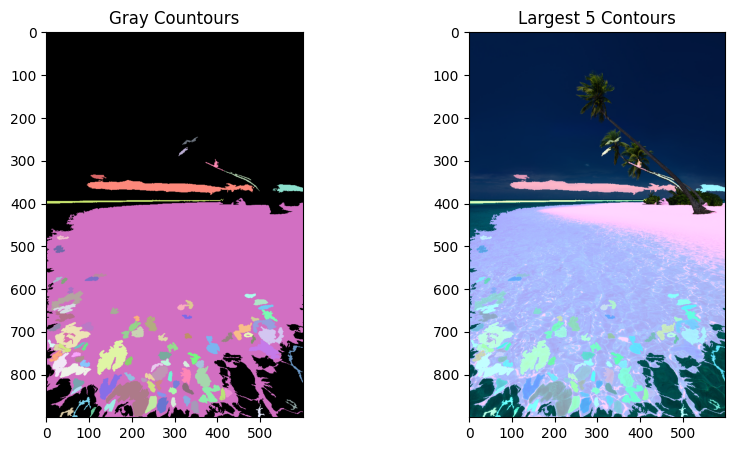

In [ ]:
# Load the image
image = cv2.imread('./beach-blue.jpg')

# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply thresholding to get a binary image
_, thresh = cv2.threshold(gray, 120, 255, cv2.THRESH_BINARY) 

# "_" deonotes that no name is given to that variable as it is not useful for this problem.
# Thresholding creates a binary image, which is used to identify contours:
    # Pixels with values above 120 are set to 255 (white).
    # Pixels below 120 are set to 0 (black).

# Find contours in the binary image
contours, _ = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

print(f'No. of Countours: {len(contours)}')

# Sort contours by area and keep the largest ones
contours= sorted(contours, key=cv2.contourArea, reverse=True)[:100]  # Only take the top 100 largest contours

# Create a mask for the filled contours
image_filled_contours = np.zeros_like(image) # An empty image to draw countours

# Draw contours
for contour in contours:
    color = (np.random.randint(100, 255), np.random.randint(100, 255), np.random.randint(100, 255)) # color = random (R, G, B)
    # color = (255,0,0) --- Static Red colour countours only 
    cv2.drawContours(image_filled_contours, [contour], -1, color, thickness=cv2.FILLED) # Filled countors with random colours.

# Combine filled contours with the original image
# You can choose to overlay the filled contours on the original image or keep them separate
# cv2.addWeighted(src1, alpha, src2, beta, gamma)
# alpha is weightage of first image and beta is weightage of second image
# gamma is brightness added to final result.

rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image_with_filled_contours = cv2.addWeighted(rgb_image, 0.5, image_filled_contours, 0.8, 0.2)

# Plot the Images
plt.figure(figsize=(10, 5))

# Plot original image
plt.subplot(1, 2, 1)
plt.imshow(image_filled_contours)
plt.title('Gray Countours')
plt.grid(False)  # Turn off grid

# Plot the blue-filtered result
plt.subplot(1, 2, 2)
plt.imshow(image_with_filled_contours)
plt.title("Largest 5 Contours")
plt.grid(False)

plt.show()

Now, we are able see 100 largest countours on the original Image.

### Contours:
- Contours are stored as a **Python list** of NumPy arrays.
- Each contour is a NumPy array of points, where each point is a **pair of (x, y) coordinates**. These coordinates represent the **positions of the boundary points** of the object.
- The structure is hierarchical:
    - A list contains all contours found in the image.
    - **Each contour** is itself an **array of (x, y) points**.
    - Example of a **single contour:** [ [[10, 20]], [[11, 22]], [[13, 25]], ... ]
    - Each point is wrapped in two pairs of brackets [[ ]]. The outer bracket is for the array structure, and the inner bracket is for the (x, y) pair.

# Find Shapes and Bounding Boxes

You can use **contour approximation** to detect specific shapes like **triangles or rectangles**. Contour approximation in OpenCV simplifies the shape of a contour by reducing the number of vertices while retaining the overall shape of the contour.

In [ ]:
 # Define function to approximate the contour

def get_shape(contour):
    # approx = cv2.approxPolyDP(curve, epsilon, closed)
    approx = cv2.approxPolyDP(contour, 0.01 * cv2.arcLength(contour, True), True)
    
    # Determine the shape based on the number of vertices
    if len(approx) == 3:
        shape = "Triangle"
    elif len(approx) == 4:
        # Check for rectangle or square
        x, y, w, h = cv2.boundingRect(approx)
        aspect_ratio = float(w) / h
        shape = "Square" if aspect_ratio == 1 else "Rectangle"
    elif len(approx) == 5:
        shape = "Pentagon"
    elif len(approx) == 6:
        shape = "Hexagon"
    elif len(approx) > 6:
        shape = "Polygon"
    else:
        shape = "Unknown"

    return (approx, shape)

Approx: [[[599 399]]

 [[ 13 460]]

 [[ 11 871]]

 [[479 899]]

 [[425 749]]

 [[599 888]]

 [[479 756]]

 [[599 723]]]
 X: [599  13  11 479 425 599 479 599]
 Y: [399 460 871 899 749 888 756 723]
cx: 400, cy: 718


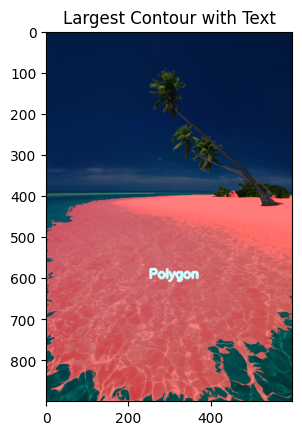

In [ ]:
image = cv2.imread('./beach-blue.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
_, thresh = cv2.threshold(gray, 120, 180, cv2.THRESH_BINARY)
contours, _ = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:1]  # Only take the largest contour

# Create a mask for the filled contours
image_filled_contours = np.zeros_like(image)

# Draw contours
for contour in contours:
    approx, shape = get_shape(contour)
    color = (255, 0 , 0) # Using static Red colour 
    cv2.drawContours(image_filled_contours, [contour], -1, color, thickness=cv2.FILLED)
    
    # Calculate position for the text below the shape
    cx, cy = int(np.mean(approx[:, 0, 0])), int(np.mean(approx[:, 0, 1]))  # Calculate centroid 
    text_position = (cx - 150, cy - 118)  # Move text position wrt cx and cy.  # set (250,600) here
    
    cv2.putText(image_filled_contours, shape, text_position, cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 5) # Font colour = (B=255,G=255,R=255) i.e. white 

print(f'Approx: {approx}')
print(f' X: {approx [:,0,0]}') # The 0 in the second position means "select the first element" of the inner 1D array (which is [[x, y]]).
print(f' Y: {approx [:,0,1]}')
print (f'cx: {cx}, cy: {cy}')

rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image_with_filled_contours = cv2.addWeighted(rgb_image, 0.5, image_filled_contours, 0.8, 1)

plt.imshow(image_with_filled_contours)
plt.title("Largest Contour with Text")
plt.grid(False)
plt.show()

#### Here, "approx" contains **eight points**, which shows that shape is an **octagon**.

# Find shapes and draw Bounding Boxes Around Contours

length of contour : 3197


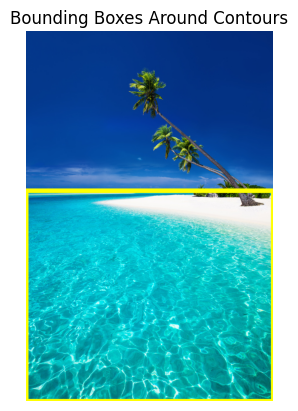

In [79]:
image = cv2.imread('./beach-blue.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
_, thresh = cv2.threshold(gray, 120, 180, cv2.THRESH_BINARY) # Here, Gray range is selected as 120-180 and not pure white.
contours, _ = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:1]  # Only take the largest contour

# Create a copy of the original image to draw on
image_with_bboxes = image.copy()

# Loop through each contour to draw bounding boxes
for contour in contours:
    print(f"length of contour : {len(contour)}")
    # Draw the bounding box around the contour
    x, y, w, h = cv2.boundingRect(contour)  # Get the bounding box coordinates
    cv2.rectangle(image_with_bboxes, (x, y), (x + w, y + h), (0, 255, 255), 10)  # Draw bounding box in yellow

# Display the result
plt.imshow(cv2.cvtColor(image_with_bboxes, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for correct display
plt.title("Bounding Boxes Around Contours")
plt.axis('off')  # Turn off axis
plt.show()
